    \item (Only for $H_2$) HEA, L-BFGS-B optimizer, Parity mapping, 2 qubit reduction, IBM Quantum hardware \begin{verbatim}ibm_brisbane\end{verbatim},

        \item circuit depth,
    \item gate fidelity,
    \item parameter count,
    \item TRAINABILITY,
    \item EXPRESSIBILITY.

     $H_2$ molecule.

     \item converged ground state energy graph, depending on the inter-atomic distance,
\item accuracy, with reference of FCI calculations, absolute error (\parencite{sims2006high}), depending on the inter-atomic distance,
\item number of iterations needed to achieve convergence (gradient tolerance is $10^{-5}$), depending on the inter-atomic distance,
\item for one inter-atomic distance, graph of convergence,
\item runtime, depending on the inter-atomic distance.


In [9]:
from lib.utils import make_hydrogen_hea, h2_hamiltonian_parity
import time
from qiskit_algorithms.optimizers import L_BFGS_B
import numpy as np
from matplotlib import pyplot as plt
from qiskit.primitives import StatevectorEstimator

## Aer simulator

In [10]:
optimizer = L_BFGS_B()
estimator = StatevectorEstimator()

In [11]:
ansatz = make_hydrogen_hea()
print(ansatz)

start = time.time()
hamiltonian_example = h2_hamiltonian_parity(distance=0.735)
end = time.time()
print(f"{0.735} case took time to make:", end - start)
print(hamiltonian_example)

     ┌────────┐     
q_0: ┤ Ry(θ1) ├──■──
     ├────────┤┌─┴─┐
q_1: ┤ Ry(θ2) ├┤ X ├
     └────────┘└───┘
0.735 case took time to make: 0.34645605087280273
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.05237325+0.j,  0.39793742+0.j, -0.39793742+0.j, -0.0112801 +0.j,
  0.1809312 +0.j])


In [13]:
# SIMULATOR
distances=[0.1, 0.2, 0.5, 0.735, 1.0, 1.5, 2.0, 3.0, 4.0]
initial_point = np.zeros(ansatz.num_parameters)
iterations = [[] for _ in range(len(distances))]
runtimes=[]
energies=[]

for i in range(len(distances)):
    qubit_hamiltonian = h2_hamiltonian_parity(distance=distances[i])
    def estimate_energy(parameters):
        job = estimator.run(
            [(ansatz, qubit_hamiltonian, parameters)]
        )
        result = job.result()[0].data.evs
        iterations[i].append(result)
        return result

    initial_point = np.zeros(ansatz.num_parameters)
    start = time.perf_counter()
    result = optimizer.minimize(fun=estimate_energy, x0=initial_point)
    end = time.perf_counter()
    runtimes.append(end - start)
    energies.append(result.fun)

[-0.7051589254466095, -0.8059544241595064, -1.1290945359940423, -1.2445845498133263, -1.275049003955566, -1.2433695886799212, -1.1891259246621833, -1.1093288969445467, -1.0654551294920436]


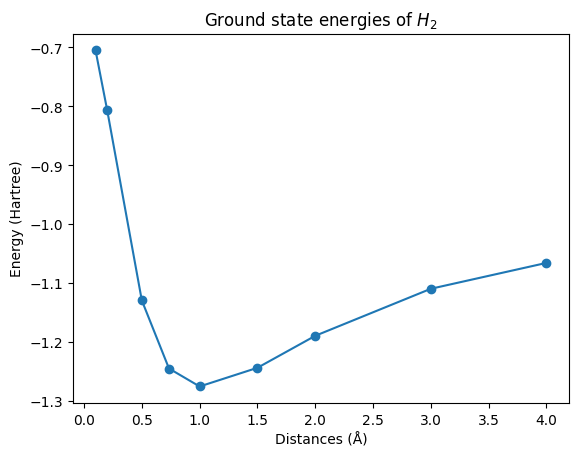

In [14]:
print(energies)
plt.plot(distances, energies, marker='o', linestyle='-')
plt.xlabel('Distances (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Ground state energies of $H_2$')
plt.show()

[[array(-0.54898867), array(-0.54898867), array(-0.54898867), array(-0.68040141), array(-0.68040141), array(-0.68040141), array(-0.67747926), array(-0.67747926), array(-0.67747926), array(-0.70515885), array(-0.70515885), array(-0.70515885), array(-0.70515893), array(-0.70515893), array(-0.70515893)], [array(-0.64798172), array(-0.64798171), array(-0.64798172), array(-0.78091117), array(-0.78091117), array(-0.78091117), array(-0.77795534), array(-0.77795534), array(-0.77795534), array(-0.80595435), array(-0.80595435), array(-0.80595435), array(-0.80595442), array(-0.80595442), array(-0.80595442)], [array(-0.96022431), array(-0.96022431), array(-0.96022431), array(-1.10232371), array(-1.1023237), array(-1.10232371), array(-1.09916382), array(-1.09916382), array(-1.09916382), array(-1.12909445), array(-1.12909445), array(-1.12909445), array(-1.12909454), array(-1.12909454), array(-1.12909454)], [array(-1.06365335), array(-1.06365335), array(-1.06365335), array(-1.2159017), array(-1.21590

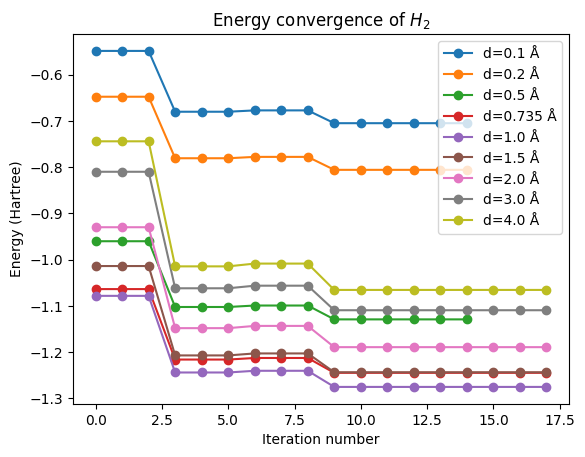

In [15]:
print(iterations)
for i in range(len(distances)):
    plt.plot(range(len(iterations[i])), iterations[i], marker='o', linestyle='-', label=f'd={distances[i]} Å')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Energy (Hartree)')
plt.title('Energy convergence of $H_2$')
plt.show()

[0.017063622013665736, 0.01813441698323004, 0.01635424798587337, 0.0228654470120091, 0.021191929990891367, 0.019627546018455178, 0.020783240004675463, 0.02008101000683382, 0.019564957998227328]


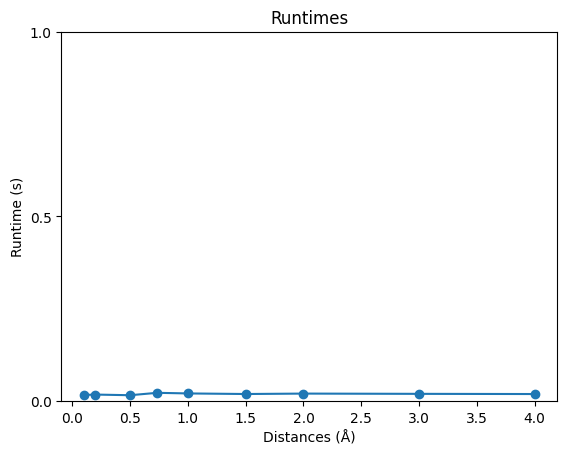

In [16]:
print(runtimes)
plt.plot(distances, runtimes, marker='o', linestyle='-', label="UCCSD")
plt.xlabel('Distances (Å)')
plt.yticks(np.arange(0, max(runtimes) + 1, 0.5))
plt.ylabel('Runtime (s)')
plt.title('Runtimes')
plt.show()

## IBM Quantum hardware

On how data was collected, checkout [./hardware/README.m](./hardware/README.md), but, in general, it is just taken from the output of `./hardware/run.ipynb` file.

This is one case of 0.735

All the runs took 13 seconds.

In [ ]:
job_times = [26.33948588371277, 25.00780177116394, 26.76294207572937, 25.58545470237732, 26.018422842025757, 27.474268674850464, 25.600987434387207, 25.030707120895386, 25.525850296020508, 26.504461526870728, 26.181912183761597, 25.583021879196167, 26.203706741333008, 27.034693717956543, 26.700570344924927, 26.038297414779663, 27.384349822998047, 26.4703209400177, 38.60314393043518, 26.014514446258545, 25.37207818031311, 26.267978191375732, 26.34986686706543, 27.095154762268066, 25.75443434715271, 27.18805694580078, 25.733174562454224, 26.0481436252594, 25.97585368156433, 25.657777309417725, 25.221819639205933, 26.70562195777893, 26.7071590423584]
energies = [-1.0412421678047858, -1.046333901573566, -1.0410840727289696, -0.9095089337096324, -0.9091354023910377, -0.9114853961913127, -0.9922459891414311, -0.9921417424597907, -0.9844034923996136, -1.0268341428251713, -1.037273123554538, -1.041203156763274, -1.0559969304495265, -1.0494574154264804, -1.0439641433872937, -1.05186810403178, -1.0484739775503584, -1.0534381555139465, -1.0534873683845691, -1.0494528738939335, -1.0496386755219675, -1.0486601860700575, -1.0520414696288611, -1.0559351678341355, -1.052714902066729, -1.0541021497722887, -1.0480200526797474, -1.048654207700061, -1.0535294170161666, -1.0521730026650182, -1.051777348736318, -1.0608939482030137, -1.047973430008839]

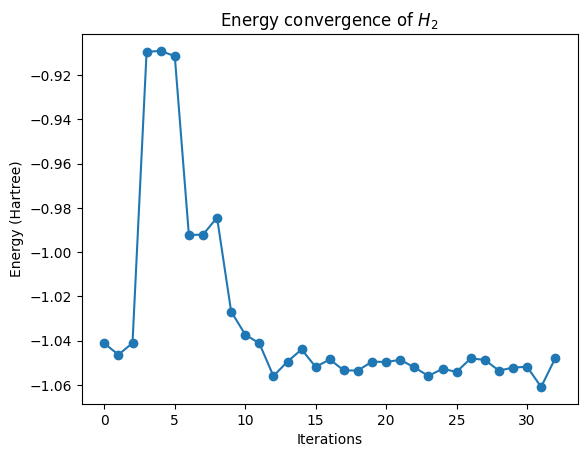

In [18]:
plt.plot(energies, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Energy (Hartree)')
plt.title('Energy convergence of $H_2$')
plt.show()